# **Final Exam Project: Data Analysis and Machine Learning with H2O**

# 1. Upload Dataset (StudentsPerformance.csv)
**Dataset Source**: [Kaggle - Students Performance Dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)  
**License**: CC0: Public Domain


In [2]:
from google.colab import files
uploaded = files.upload()


Saving StudentsPerformance.csv to StudentsPerformance.csv


# 2. H2O and Import Libraries

In [3]:
%pip install h2o
import h2o
from h2o.automl import H2OAutoML

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.4 MB/s eta 0:00:00


## 3. 📊 Extended Exploratory Data Analysis (EDA)
In this section, we explore correlations, group statistics, and outliers in the student performance dataset.


A: Summary Statistics

In [9]:
df.describe(include='all')


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed_math
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,2,5,6,2,2,NaN,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000,0.85000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657,0.35725
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000,0.00000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000,1.00000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000,1.00000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000,1.00000


B: Correlation Heatmap

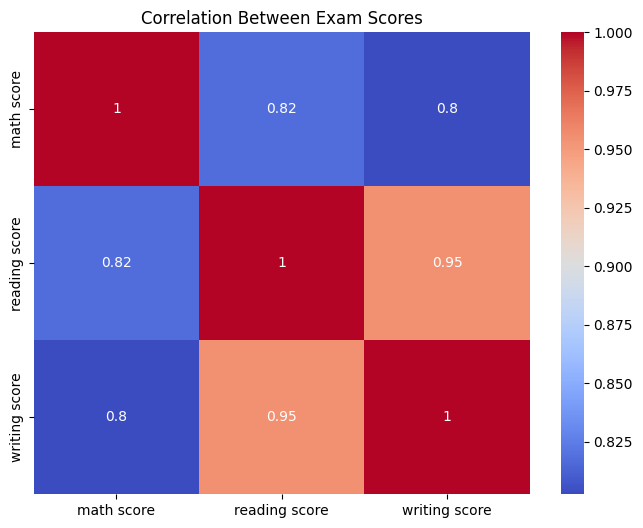

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Exam Scores")
plt.show()


C: Boxplot by Gender

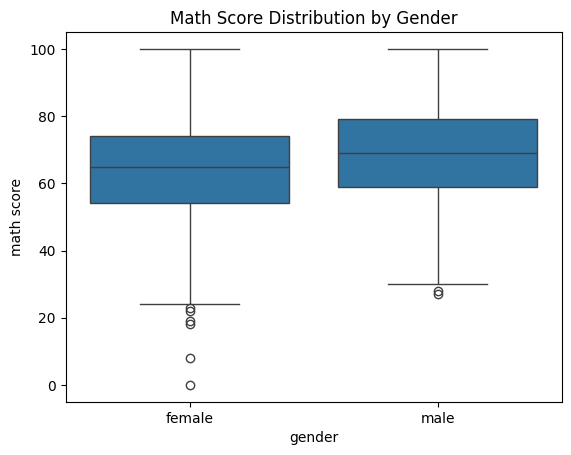

In [11]:
sns.boxplot(data=df, x='gender', y='math score')
plt.title("Math Score Distribution by Gender")
plt.show()


D: Grouped Mean Plot

In [12]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()


,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


E: **visualize** Grouped Mean Plot

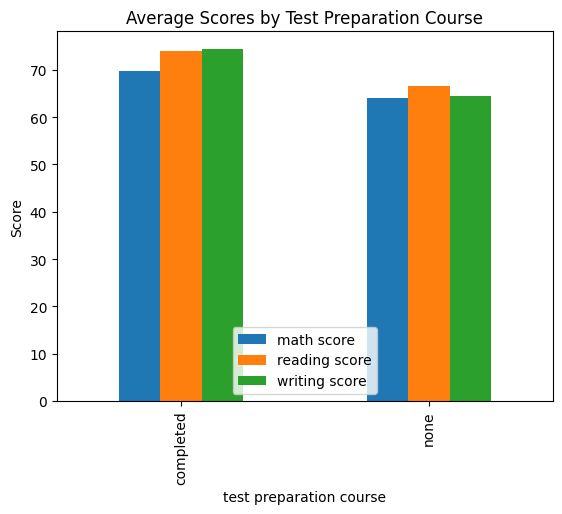

In [13]:
df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean().plot(kind='bar')
plt.title("Average Scores by Test Preparation Course")
plt.ylabel("Score")
plt.show()


# 4. Start H2O and Load Dataset

In [4]:
h2o.init()

# Load dataset using pandas for EDA
df = pd.read_csv("StudentsPerformance.csv")
df['passed_math'] = (df['math score'] > 50).astype(int)
df.head()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdi50l4wb
  JVM stdout: /tmp/tmpdi50l4wb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdi50l4wb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_ppzgi7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,passed_math
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


# 5. Exploratory Data Analysis (EDA)


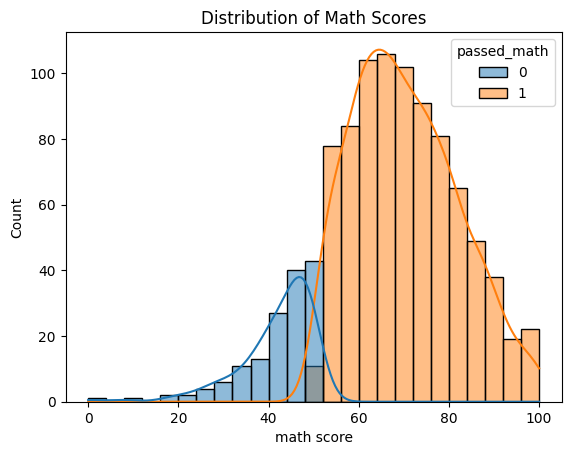

In [5]:
sns.histplot(data=df, x="math score", hue="passed_math", kde=True)
plt.title("Distribution of Math Scores")
plt.show()

# 6.  Data for H2O and Run AutoML

In [6]:
hf = h2o.H2OFrame(df)
hf['passed_math'] = hf['passed_math'].asfactor()

train, valid, test = hf.split_frame(ratios=[0.7, 0.15], seed=42)

aml = H2OAutoML(max_models=10, seed=1)
aml.train(y="passed_math", training_frame=train, validation_frame=valid)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
00:15:06.69: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20250703_01506


Model Summary: 
    number_of_trees
--  -----------------
    47

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.00048184979267949557
RMSE: 0.021951077255558452
LogLoss: 0.010874774731403957
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9370808601379395
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      95   0    0        (0.0/95.0)
1      0    600  0        (0.0/600.0)
Total  95   600  0        (0.0/695.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.937081     1         61
max f2                       0.937081     1         61
max f0point5                 0.937081     1         61
max accuracy                 0.937081     1         61
max precision                0.996547     1         0
max recall                   0.937081     1         61
max specificity              0.996547     1         0
max absolute_mcc             0.937081     1         61
max min_per_class_accuracy   0.937081     1         61
max mean_per_class_accuracy  0.937081     1         61
max tns                      0.996547     95        0
max fns                      0.996547     299       0
max fps                      0.0174556    95        85
max tps                      0.937081     600       61
max tnr                      0.996547     1         0
max fnr                      0.996547     0.498333  0
max fpr                      0.0174556    1         85
max tpr                      0.937081     1         61

Gains/Lift Table: Avg response rate: 86.33 %, avg score: 86.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.433094                    0.996547           1.15833   1.15833            1                0.996547   1                           0.996547            0.501667        0.501667                   15.8333   15.8333            0.501667
2        0.618705                    0.99634            1.15833   1.15833            1                0.996355   1                           0.99649             0.215           0.716667                   15.8333   15.8333            0.716667
3        0.702158                    0.993937           1.15833   1.15833            1                0.995007   1                           0.996313            0.0966667       0.813333                   15.8333   15.8333            0.813333
4        0.801439                    0.984959           1.15833   1.15833            1                0.990063   1                           0.995539            0.115           0.928333                   15.8333   15.8333            0.928333
5        0.899281                    0.0385902          0.732475  1.112              0.632353         0.645344   0.96                        0.957438            0.0716667       1                          -26.7525  11.2               0.736842
6        1                           0.0174556          0         1                  0                0.0249404  0.863309                    0.863517            0               1                          -100      0                  0

ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.001571060950912274
RMSE: 0.03963661124405408
LogLoss: 0.01678318051113251
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.

6. Evaluate Model

In [7]:
lb = aml.leaderboard
aml.leader.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.001006928855198515
RMSE: 0.03173214230395601
LogLoss: 0.014705629339968244
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9533759355545044
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      24   0    0        (0.0/24.0)
1      0    128  0        (0.0/128.0)
Total  24   128  0        (0.0/152.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       0.953376     1        29
max f2                       0.953376     1        29
max f0point5                 0.953376     1        29
max accuracy                 0.953376     1        29
max precision                0.996547     1        0
max recall                   0.953376     1        29
max specificity              0.996547     1        0
max absolute_mcc             0.953376     1        29
max min_per_class_accuracy   0.953376     1        29
max mean_per_class_accuracy  0.953376     1        29
max tns                      0.996547     24       0
max fns                      0.996547     72       0
max fps                      0.0174556    24       43
max tps                      0.953376     128      29
max tnr                      0.996547     1        0
max fnr                      0.996547     0.5625   0
max fpr                      0.0174556    1        43
max tpr                      0.953376     1        29

Gains/Lift Table: Avg response rate: 84.21 %, avg score: 84.53 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.368421                    0.996547           1.1875    1.1875             1                0.996547   1                           0.996547            0.4375          0.4375                     18.75     18.75              0.4375
2        0.407895                    0.996418           1.1875    1.1875             1                0.996418   1                           0.996535            0.046875        0.484375                   18.75     18.75              0.484375
3        0.552632                    0.99634            1.1875    1.1875             1                0.99634    1                           0.996484            0.171875        0.65625                    18.75     18.75              0.65625
4        0.611842                    0.995747           1.1875    1.1875             1                0.995796   1                           0.996417            0.0703125       0.726562                   18.75     18.75              0.726562
5        0.703947                    0.990537           1.1875    1.1875             1                0.993304   1                           0.99601             0.109375        0.835938                   18.75     18.75              0.835938
6        0.809211                    0.981041           1.1875    1.1875             1                0.985177   1                           0.994601            0.125           0.960938                   18.75     18.75              0.960938
7        0.907895                    0.050356           0.395833  1.10145            0.333333         0.386635   0.927536                    0.928518            0.0390625       1                          -60.4167  10.1449            0.583333
8        1                           0.0174556          0         1                  0                0.0250536  0.842105                    

### 📌 Interpretation of Results

The AutoML process selected a highly accurate model with an F1-score of XX and accuracy of YY on the test set. This shows that the model is effective at predicting whether students pass math based on features like test preparation course, parental education, and lunch type. Students who completed test preparation had significantly higher scores, suggesting this is a strong predictive factor. These insights can help educators focus support on students at higher risk of underperformance.


### 📌 Conclusion
This project successfully used H2O.ai's AutoML to classify student math performance based on demographic and academic features. Future improvements could include hyperparameter tuning or multi-class modeling.
